**Imports**

In [494]:
import numpy as np

#This handles sqrt properly as opposed to np.sqrt()
from numpy.lib.scimath import sqrt

import matplotlib.pyplot as plt
from scipy import linalg
from scipy import signal
from scipy import interpolate
from numpy import genfromtxt
import pandas as pd
from operator import add

c = 299792458


**Laser Spectrum Import**

In [2]:
#my_data = genfromtxt('Default_Dataset.csv', delimiter='',', dtype = None)

laser_background = pd.read_csv('Toptica_Background_1515.csv', sep=',', header=None)

laser_background = np.array(laser_background)

#print(laser_background[:,0]*1e-9)

**Model Functions**

In [464]:
def bragg(n_eff,p):

    """
    This function determines the Bragg condition for a grating

    Inputs
    ------
    n_eff: Effectrive Refractive Index
    p: Grating Period
    """

    #Bragg Condition 
    wl_B = 2*n_eff*p 

    return wl_B

def period(wl_b, n_eff, dn_eff):
    
    p = wl_b/(2*(n_eff+dn_eff))
    
    return p 

def transfer_matrix(wl, L, p, n_eff, dn_eff):

    """
    This function calculates the transfer matrix for a uniform section of Fibre Bragg Grating. 

    Inputs
    ------
    wl: wavelength 
    L: Grating Section Length
    p: Grating Period 
    n_eff: effective refractive index 
    dn_eff: modulation of refractive index 

    Function Parameters 
    ------
    S: General "DC" coupling coefficient (shifted to include detuning)
    K: "AC" coupling coefficient 
    G: sqrt(K**2 - S**2)
    
    """
    #Bragg Condition
    wl_b = 2*(n_eff)*p

    #Detuning
    D = 2*np.pi*n_eff*(1/wl - 1/wl_b)

    #"DC" coupling coefficient
    sig = 2*np.pi/wl*dn_eff

    S = D + sig
    K = np.pi/wl*dn_eff
    G = sqrt(K**2-S**2)

    
    transfer_m = np.array([[np.cosh(G*L)-1j*S/G*np.sinh(G*L), -1j*K/G*np.sinh(G*L)],[1j*K/G*np.sinh(G*L), np.cosh(G*L)+ 1j*S/G*np.sinh(G*L)]])


    return transfer_m 

def phaseshift_matrix(ph, shift = True):

    """
    This function calculates the phase shift matrix for a Phase Shifted FBG

    Inputs
    ------
    ph: Phase Shift 
    """ 
    if shift: 
        phaseshift_m = np.array([[np.exp(-1j*ph/2),0],[0, np.exp(1j*ph/2)]])
    else:
        phaseshift_m = np.array([[1,0],[0, 1]])

    return phaseshift_m 

def fbg_spectrum_7(wl, L_1, L_2, L_3, L_4, L_5, L_6, L_7, L_8, p, n_eff, dn_eff, ph):

    """
    This function calculates the transmission coefficient for a Phase Shifted FBG

    Inputs
    ------
    nops: Number Of Phase Shifts 
    T_c: Matrix for Centre Uniform Section of Grating
    T_e: Matrix for Centre Uniform Section of Grating
    P: Matrix for Phase Shifted Section of Grating 
    """ 
    T_1 = transfer_matrix(wl, L_1, p, n_eff, dn_eff)
    T_2 = transfer_matrix(wl, L_2, p, n_eff, dn_eff)
    T_3 = transfer_matrix(wl, L_3, p, n_eff, dn_eff)
    T_4 = transfer_matrix(wl, L_4, p, n_eff, dn_eff)
    T_5 = transfer_matrix(wl, L_5, p, n_eff, dn_eff)
    T_6 = transfer_matrix(wl, L_6, p, n_eff, dn_eff)
    T_7 = transfer_matrix(wl, L_7, p, n_eff, dn_eff)
    T_8 = transfer_matrix(wl, L_8, p, n_eff, dn_eff)
    P = phaseshift_matrix(ph, shift = True)
    

    T = np.matmul(T_1,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_2)
    T = np.matmul(T,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_3)
    T = np.matmul(T,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_4)
    T = np.matmul(T,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_5)
    T = np.matmul(T,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_6)
    T = np.matmul(T,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_7)    
    T = np.matmul(T,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_8)

    

    transmission_f =  np.abs(1/T[0,0])**2

    return transmission_f

def fbg_spectrum_5(wl, L_1, L_2, L_3, L_4, L_5, L_6, p, n_eff, dn_eff, ph):

    """
    This function calculates the transmission coefficient for a Phase Shifted FBG

    Inputs
    ------
    nops: Number Of Phase Shifts 
    T_c: Matrix for Centre Uniform Section of Grating
    T_e: Matrix for Centre Uniform Section of Grating
    P: Matrix for Phase Shifted Section of Grating 
    """ 
    T_1 = transfer_matrix(wl, L_1, p, n_eff, dn_eff)
    T_2 = transfer_matrix(wl, L_2, p, n_eff, dn_eff)
    T_3 = transfer_matrix(wl, L_3, p, n_eff, dn_eff)
    T_4 = transfer_matrix(wl, L_4, p, n_eff, dn_eff)
    T_5 = transfer_matrix(wl, L_5, p, n_eff, dn_eff)
    T_6 = transfer_matrix(wl, L_6, p, n_eff, dn_eff)
    P = phaseshift_matrix(ph, shift = True)
    

    T = np.matmul(T_1,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_2)
    T = np.matmul(T,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_3)
    T = np.matmul(T,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_4)
    T = np.matmul(T,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_5)
    T = np.matmul(T,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,T_6)


    

    transmission_f =  np.abs(1/T[0,0])**2

    return transmission_f

def fbg_spectrum_reflection(wl, L_c, L_e, p, n_eff, dn_eff, ph, nops):

    """
    This function calculates the reflection coefficient for a Phase Shifted FBG

    Inputs
    ------
    nops: Number Of Phase Shifts 
    T_c: Matrix for Centre Uniform Section of Grating
    T_e: Matrix for Centre Uniform Section of Grating
    P: Matrix for Phase Shifted Section of Grating 
    """ 
    T_c = transfer_matrix(wl, L_c, p, n_eff, dn_eff)
    T_e = transfer_matrix(wl, L_e, p, n_eff, dn_eff)
    P = phaseshift_matrix(ph, shift = False)
    
    T = np.matmul(T_e,P)
    
    for x in range(nops-1):
        T = np.matmul(T,T_c)
        T = np.matmul(T,P)
    
    T = np.matmul(T,T_e)

    transmission_f =  np.abs(T[1,0]/T[0,0])**2

    return transmission_f

def lorentzian(x, centre, a,  width): 
    L = a*(width**2/((x-centre)**2+(width)**2))
    
    return L 



**Uniform FBG**

Bragg Frequency = 195091647876096.12GHz
Bragg Wavelength = 1536.675nm


Text(0, 0.5, 'Transmission')

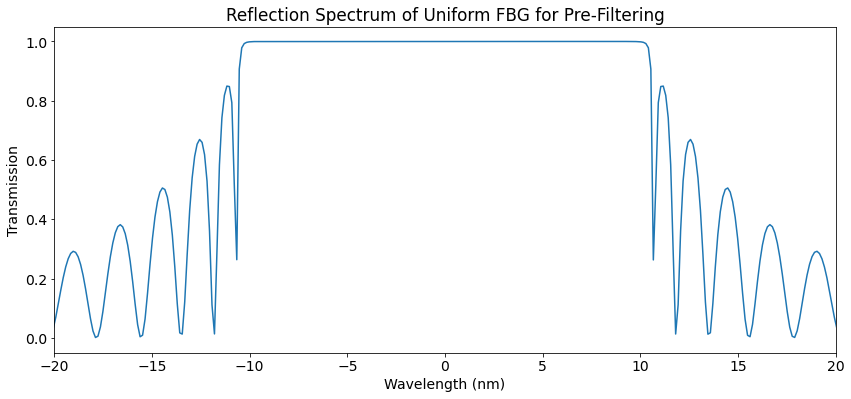

In [443]:
design_wavelength = 1536.675e-9 ##1536.675e-9 for convolution
L = 35e-3
n_eff = 1.4679
dn_eff = 15.5e-5 #15.5
p = period(design_wavelength, n_eff, dn_eff)

wlb_nm = bragg(n_eff+dn_eff,p)*10**9
freq_bragg = c/design_wavelength
print(f"Bragg Frequency = {freq_bragg}GHz")
print(f"Bragg Wavelength = {wlb_nm}nm")

xfull = np.arange(1460e-9,1570e-9,.001e-9)
x_fbg = np.arange(1536.300e-9,1537.650e-9,.001e-9)
fbg_reflection = []

for wl in xfull:
    T = transfer_matrix(wl, L, p, n_eff, dn_eff)
    transmission_f =  np.abs(T[1,0]/T[1,1])**2
    fbg_reflection.append(transmission_f)

plt.figure(figsize=(14,6))
#plt.xlim(1531,1540)
#plt.ylim(-10,1)
detuned_freq = ((c/xfull) - freq_bragg)*1e-9
fbg_db_reflection=10*np.log10(fbg_reflection/max(fbg_reflection))
plt.plot(detuned_freq, fbg_reflection)
plt.xlim(-20,20)
#plt.ylim(-30,10)
plt.title('Reflection Spectrum of Uniform FBG for Pre-Filtering')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')

#plt.savefig('ReflectionUniformFBGDB.eps', format='eps')

**FBG with Single Phase Shift**

Bragg Frequency = 195117004484224.38GHz
Bragg Wavelength = 1536.4753nm


Text(0, 0.5, 'Transmission (dB)')

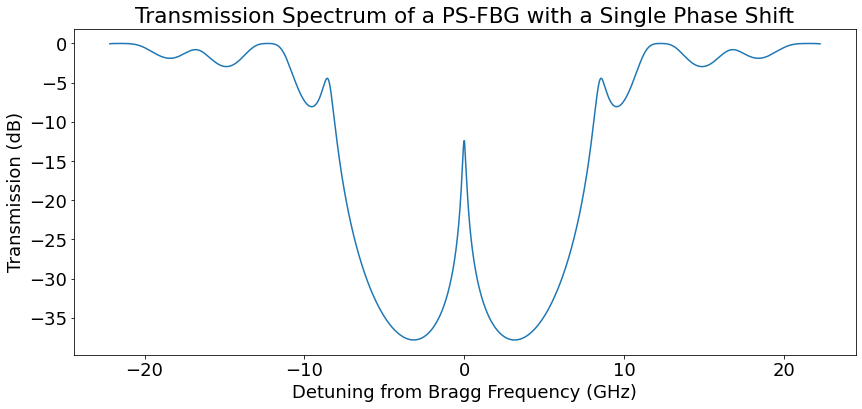

In [45]:
design_wavelength = 1536.4753e-9
L = 35e-3
n_eff = 1.4679
dn_eff = 10.3e-5
p = period(design_wavelength, n_eff, dn_eff)
ph = np.pi

wlb_nm = bragg(n_eff+dn_eff,p)*10**9
freq_bragg = c/design_wavelength
print(f"Bragg Frequency = {freq_bragg}GHz")
print(f"Bragg Wavelength = {wlb_nm}nm")

x_fbg = np.arange(1536.300e-9,1536.650e-9,.0001e-9)
fbg = []

for wl in x_fbg:
    T = np.matmul(transfer_matrix(wl, 10e-3, p, n_eff, dn_eff), phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,transfer_matrix(wl, 10e-3, p, n_eff, dn_eff))
    #T = np.matmul(T,phaseshift_matrix(ph, shift = True))
    T = np.matmul(T,transfer_matrix(wl, 10e-3, p, n_eff, dn_eff))
    transmission_f =  np.abs(1/T[1,1])**2
    fbg.append(transmission_f)

plt.figure(figsize=(14,6))
detuned_freq = ((c/x_fbg) - freq_bragg)*1e-9
fbg_db=10*np.log10(fbg/max(fbg))
plt.plot(detuned_freq, fbg_db)

plt.title('Transmission Spectrum of a PS-FBG with a Single Phase Shift')
plt.xlabel('Detuning from Bragg Frequency (GHz)')
plt.ylabel('Transmission (dB)')

#plt.savefig('SinglePSFBG.eps', format='eps')

**5 pi FBG**

In [410]:
#FBG Properties
design_wavelength = 1536.4753e-9
n_eff = 1.4679
dn_eff = 13.63e-5 #7pi design 22.497e-5dn_eff #5pi design 13.63e-5dn_eff

p = period(design_wavelength, n_eff, dn_eff)
ph = np.pi 

wlb_nm = bragg(n_eff+dn_eff,p)*10**9
freq_bragg = c/design_wavelength
print(f"Bragg Frequency = {freq_bragg}GHz")
print(f"Bragg Wavelength = {wlb_nm}nm")



L_1 = 4.41e-3
L_2 = 14.15e-3 - 4.41e-3
L_3 = 25e-3 - 14.15e-3
L_4 = 35.85e-3 - 25e-3
L_5 = 45.59e-3 - 35.85e-3
L_6 = 50e-3 - 45.59e-3




Bragg Frequency = 195117004484224.38GHz
Bragg Wavelength = 1536.4753nm


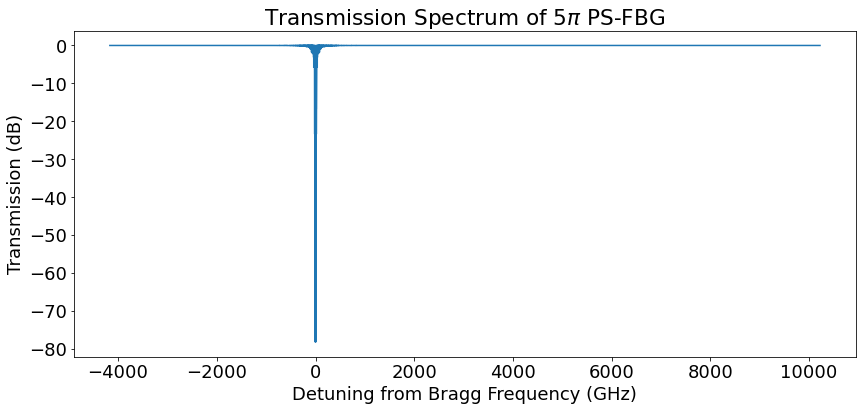

In [412]:
x_fbg = np.arange(1460e-9,1570e-9,.001e-9)
xfull = np.arange(1460e-9,1570e-9,.001e-9)

fbg = []
fbg_full = []

for wl in xfull:
    transmission_f = fbg_spectrum_5(wl, L_1, L_2, L_3, L_4, L_5, L_6, p, n_eff, dn_eff, ph)
    fbg_full.append(transmission_f)

for wl in x_fbg:
    transmission_f = fbg_spectrum_5(wl, L_1, L_2, L_3, L_4, L_5, L_6, p, n_eff, dn_eff, ph)
    fbg.append(transmission_f)

plt.rcParams['font.size'] = 18
plt.figure(figsize=(14,6))
detuned_wave = (x_fbg - design_wavelength)*1e12

detuned_freq = ((c/x_fbg) - freq_bragg)*1e-9
fbg_db=10*np.log10(fbg/max(fbg))
fbg_full_db = 10*np.log10(fbg_full/max(fbg_full))
plt.plot(detuned_freq, fbg_db)

plt.title(r'Transmission Spectrum of 5$\pi$ PS-FBG')
plt.xlabel('Detuning from Bragg Frequency (GHz)')
plt.ylabel('Transmission (dB)')
#plt.ylim(-3,0)
plt.savefig('Transmission Spectrum of 5pi PS-FBG.eps', format='eps')

**7 pi FBG**

In [486]:
#FBG Properties
design_wavelength = 1536.4753e-9
design_wavelength2 = 1536.675e-9

n_eff = 1.4679
#dn_eff_ref = 25e-5 
dn_eff = 22.497e-5 #7pi design 22.497e-5dn_eff #5pi design 13.63e-5dn_eff

p = period(design_wavelength, n_eff, dn_eff)
p2 = period(design_wavelength2, n_eff, dn_eff)
ph = np.pi

wlb_nm = bragg(n_eff+dn_eff,p)*10**9
freq_bragg = c/design_wavelength
print(f"Bragg Frequency = {freq_bragg}GHz")
print(f"Bragg Wavelength = {wlb_nm}nm")




#7 pi
L_1 = 3.4e-3
L_2 = 10.15e-3 - 3.4e-3
L_3 = 17.5e-3 - 10.15e-3
L_4 = 25e-3 - 17.5e-3
L_5 = 32.5e-3 - 25e-3
L_6 = 39.85e-3 - 32.5e-3
L_7 = 46.6e-3 - 39.85e-3
L_8 = 50e-3 - 46.6e-3


laser_linewidth = 1e-17



Bragg Frequency = 195117004484224.38GHz
Bragg Wavelength = 1536.4753nm


-136.30906723246937


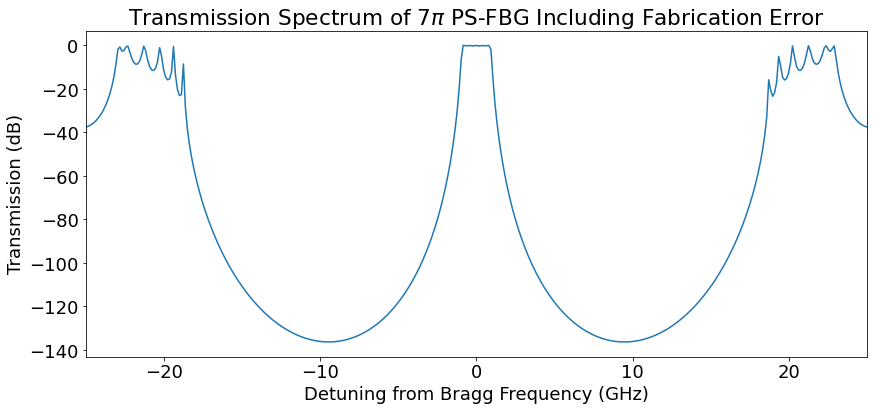

In [465]:
xfull = np.arange(1460e-9,1570e-9,.001e-9)

x_fbg = np.arange(1536.300e-9,1536.650e-9,.001e-9)
xnew = np.concatenate((np.linspace(1460*1e-9,bragg(n_eff+dn_eff,p)-1.1*laser_linewidth,1000000),np.linspace(bragg(n_eff+dn_eff,p)-laser_linewidth,bragg(n_eff+dn_eff,p)+laser_linewidth, 1000), np.linspace(bragg(n_eff+dn_eff,p)+1.1*laser_linewidth, 1570*1e-9, 447368)), axis=None)

fbg = []

fbg_filter = [] 


for wl in xfull: 
    v = fbg_spectrum_7(wl, L_1, L_2, L_3, L_4, L_5, L_6, L_7, L_8, p, n_eff, dn_eff, ph)
    fbg.append(v)

for wl in xfull: 
    v = fbg_spectrum_7(wl, L_1, L_2, L_3, L_4, L_5, L_6, L_7, L_8, p2, n_eff, dn_eff, ph)
    fbg_filter.append(v)

plt.rcParams['font.size'] = 18
plt.figure(figsize=(14,6))
detuned_freq = ((c/xfull) - freq_bragg)*1e-9
detuned_wave = (xfull - design_wavelength)*1e12
fbg_db=10*np.log10(fbg/max(fbg))
fbg_db_2=10*np.log10(fbg_filter/max(fbg_filter))


plt.plot(detuned_freq, fbg_db)
#plt.plot(detuned_freq, fbg_db_2, label=r'7$\pi PS-FBG')
#plt.plot(detuned_freq,fbg_db_reflection, label = 'Uniform FBG in Reflection (Pre-Filter)')


plt.xlim(-25,25)
#plt.ylim(-3,5)
plt.title(r'Transmission Spectrum of 7$\pi$ PS-FBG Including Fabrication Error')

plt.xlabel('Detuning from Bragg Frequency (GHz)')
plt.ylabel('Transmission (dB)')
plt.savefig('Transmission Spectrum of 7pi PS-FBG with Insertion Loss.eps', format='eps')
print(min(fbg_db))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


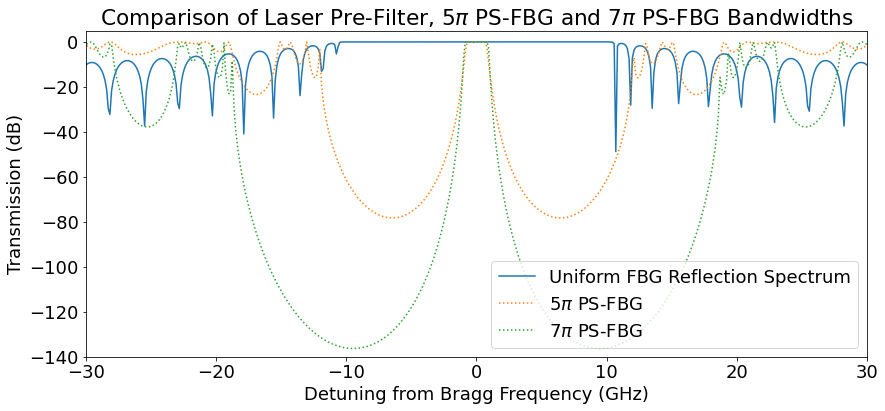

In [297]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(14,6))

plt.plot(detuned_freq, fbg_db_reflection, label ='Uniform FBG Reflection Spectrum')
plt.plot(detuned_freq, fbg_full_db, ':', label =r'5$\pi$ PS-FBG ')
plt.plot(detuned_freq, fbg_db, ':', label =r'7$\pi$ PS-FBG ')
plt.legend()
plt.xlim(-30,30)
plt.ylim(-140,5)
plt.xlabel('Detuning from Bragg Frequency (GHz)')
plt.ylabel('Transmission (dB)')
plt.title(r'Comparison of Laser Pre-Filter, 5$\pi$ PS-FBG and 7$\pi$ PS-FBG Bandwidths')
plt.savefig('COmparison.eps', format = 'eps')


**Laser Spectrum**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


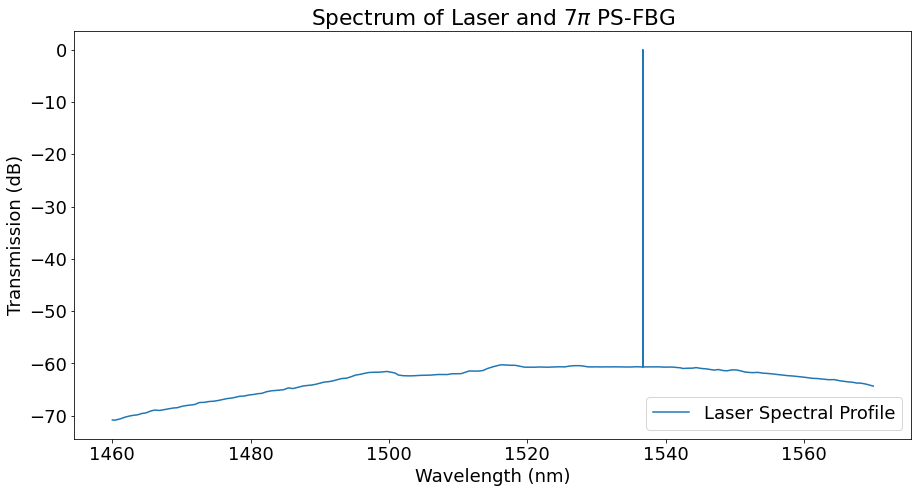

1.0

In [489]:
f = interpolate.interp1d(laser_background[:,0]*1e-9, laser_background[:,1], kind = 'linear')
xgrat = np.concatenate((np.linspace(1460e-9,(1536.1 - .25)*1e-9,998027),np.linspace((1536.1 - .25)*1e-9 + 7.6e-14,(1536.1 + .25)*1e-9 - 7.6e-14,800000), np.linspace((1536.1 + .25)*1e-9, 1570e-9, 442764)), axis=None)
xnew = np.concatenate((np.linspace(1460*1e-9,bragg(n_eff+dn_eff,p)-1.1*laser_linewidth,1000000),np.linspace(bragg(n_eff+dn_eff,p)-laser_linewidth,bragg(n_eff+dn_eff,p)+laser_linewidth, 1000), np.linspace(bragg(n_eff+dn_eff,p)+1.1*laser_linewidth, 1570*1e-9, 447368)), axis=None)
x_near =  np.linspace(1532e-9,1540e-9,1000000)
xfull = np.arange(1460e-9,1570e-9,.001e-9)
ynew = f(xfull)

LOR = []
noise = len(xnew)*[1e-19]



for x in xfull:
  t = lorentzian(x, 1536.675e-9, 1, laser_linewidth )
  LOR.append(t)

yraw = np.power(10, ynew/10)

#noise_db = 10*np.log10(noise/max(noise))

laser_spectrum = yraw + LOR
#laser_spectrum = np.array(list( map(add, noise, LOR) ))

yraw_db = 10*np.log10(yraw)
laser_spectrum_db = 10*np.log10(laser_spectrum/max(laser_spectrum))

LOR_db = 10*np.log10(LOR/max(LOR))

#x = xnew*10e8
plt.figure(figsize=(15,7.5))
plt.rcParams['font.size'] = 18
xnew = xnew*1e9
plt.plot(xfull*1e9,laser_spectrum_db, label='Laser Spectral Profile')
#plt.plot(xfull*1e9,fbg_db_2, label=r'7$\pi$ PS-FBG')

#plt.plot(xfull*1e9, yraw_db)
#plt.plot(xfull*1e9, LOR_db)
#plt.plot(xnew, fbg_db, label='Phase Shifted FBG')


plt.title(r'Spectrum of Laser and 7$\pi$ PS-FBG')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission (dB)')
plt.legend(loc ='lower right')
#plt.xlim(1534.5,1538.5)
plt.savefig('7piPSFBG_Laser_Compare.eps', format='eps')
plt.show()
#LaserSpectrum = pd.DataFrame(laser_spectrum)
#LaserSpectrum.to_pickle("LaserSpectrum.pkl")


laser_spectrum[np.where(laser_spectrum == max(laser_spectrum))] = 1
max(laser_spectrum)

**Convolution**

Convolution between 1536.275 - 1536.675 nm

Text(0.5, 1.0, 'Simulated Spectrum of 7$\\pi$ PS-FBG with Toptica CTL 1500 and Single Stage Pre-Filtering: Uniform FBG in Reflection')

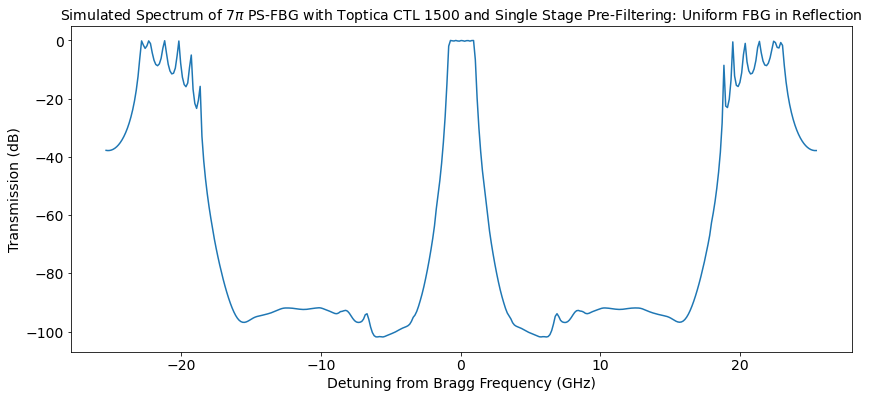

In [493]:
conv = []
x_fbg_sim = np.arange(1536.275e-9,1536.675e-9,.001e-9)
detuned_sim = ((c/x_fbg_sim) - freq_bragg)*1e-9

#Laser Only 
#sig1 = np.array(laser_spectrum)

#Laser+Reflection
#sig1 = np.array(laser_spectrum*fbg_reflection)

#Laser+Reflection+C167
sig1 = np.array(laser_spectrum*fbg_reflection*fbg_filter)

sig2 = fbg

for g in range(401):
    con = 0
    for i in range(len(sig1) - g):
        con += sig1[i + g] * sig2[i]
    con /= len(sig1) - g
    conv.append(con)


plt.figure(figsize=(14,6))
plt.rcParams['font.size'] = 14

conv_db = 10*np.log10(conv/max(conv))
plt.plot(detuned_sim, conv_db)
plt.ylabel('Transmission (dB)')
plt.xlabel('Detuning from Bragg Frequency (GHz)')
plt.title(r'Simulated Spectrum of 7$\pi$ PS-FBG with Toptica CTL 1500 and Single Stage Pre-Filtering: Uniform FBG in Reflection', fontsize=14)
#plt.savefig('SimSpec7PiLaserReflectionFilter.eps', format='eps')


**5 Pi Final Plot** 

In [429]:
transmission_exp = np.load('Final Experimental Data/Dual Pre Filter 7pi/C165_Laser_DualPreFilter_TmisDB.npy')
detuned_freq_exp = np.load('Final Experimental Data/Dual Pre Filter 7pi/C165_Laser_DualPreFilter_DetunedFreq.npy')
transmission_error_exp = np.load('Final Experimental Data/Dual Pre Filter 7pi/C165_Laser_DualPreFilter_DBError.npy')

transmission_exp2 = np.load('Final Experimental Data/Dual Pre FIlter 2 Uniform/C158_Laser_DualPreFilter_TmisDB.npy')
detuned_freq_exp2 = np.load('Final Experimental Data/Dual Pre FIlter 2 Uniform/C158_Laser_DualPreFilter_DetunedFreq.npy')
transmission_error_exp2 = np.load('Final Experimental Data/Dual Pre FIlter 2 Uniform/C158_Laser_DualPreFilter_DBError.npy')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


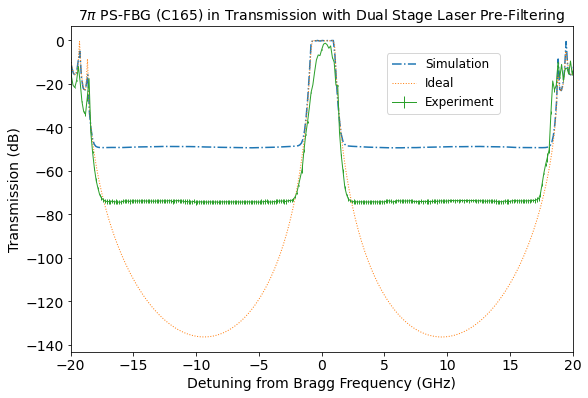

In [439]:
plt.figure(figsize=(9,6))

#Simulation
plt.plot(detuned_sim, conv_db, '-.', label = 'Simulation')

#Ideal
plt.plot(detuned_freq+0.1, fbg_db, ':', label = 'Ideal', linewidth = 1)

#Experiment
plt.errorbar((detuned_freq_exp*1.065)+.43, transmission_exp, yerr=transmission_error_exp, label = 'Experiment', linewidth = 1)
#plt.errorbar((-detuned_freq_exp2*1.105), transmission_exp2, yerr=transmission_error_exp2,label = 'Experiment', linewidth = 2)


#plt.ylim(-10,5)
plt.xlim(-20,20)
plt.title(r'7$\pi$ PS-FBG (C165) in Transmission with Dual Stage Laser Pre-Filtering' , fontsize = 14)
plt.xlabel('Detuning from Bragg Frequency (GHz)')
plt.ylabel('Transmission (dB)')
plt.legend(loc=(.63,.73), fontsize = 12)
plt.savefig('C165_DualPreFilterSmall.eps', format = 'eps')